Importing libraries

In [2]:
import pandas as pd
import numpy as np

The file that we are importing gives information about what was purchased on which day during each transaction. 

In [5]:
ctd = pd.read_csv('Customer_transactions_agg.csv')

In [6]:
print(ctd.shape)
print(ctd.head())

(142445, 8)
   Unnamed: 0  customer_id        date  TotalPrice  selling_price  \
0           0            1  2012-02-21     2101.23        2603.45   
1           1            1  2012-03-08     1125.22        1431.20   
2           2            1  2012-03-29      511.85         691.73   
3           3            1  2012-04-04     1600.04        1913.50   
4           4            1  2012-04-11     1155.87        1702.28   

   other_discount  coupon_discount    InvoiceNo  
0         -537.84           -35.62  2012-02-211  
1         -305.98             0.00  2012-03-081  
2         -179.88             0.00  2012-03-291  
3         -331.27           -17.81  2012-04-041  
4         -546.41             0.00  2012-04-111  


In [7]:
ctd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142445 entries, 0 to 142444
Data columns (total 8 columns):
Unnamed: 0         142445 non-null int64
customer_id        142445 non-null int64
date               142445 non-null object
TotalPrice         142445 non-null float64
selling_price      142445 non-null float64
other_discount     142445 non-null float64
coupon_discount    142445 non-null float64
InvoiceNo          142445 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 8.7+ MB


In [8]:
ctd.isnull().sum()

Unnamed: 0         0
customer_id        0
date               0
TotalPrice         0
selling_price      0
other_discount     0
coupon_discount    0
InvoiceNo          0
dtype: int64

No null values

In [9]:
ctd = ctd.drop_duplicates()

In [10]:
ctd.shape

(142445, 8)

In [11]:
ctd.head()

,Unnamed: 0,customer_id,date,TotalPrice,selling_price,other_discount,coupon_discount,InvoiceNo
0,0,1,2012-02-21,2101.23,2603.45,-537.84,-35.62,2012-02-211
1,1,1,2012-03-08,1125.22,1431.20,-305.98,0.00,2012-03-081
2,2,1,2012-03-29,511.85,691.73,-179.88,0.00,2012-03-291
3,3,1,2012-04-04,1600.04,1913.50,-331.27,-17.81,2012-04-041
4,4,1,2012-04-11,1155.87,1702.28,-546.41,0.00,2012-04-111


In [12]:
import datetime as dt
current_date = dt.datetime(2013,7,4)
current_date
print(ctd.date.dtype)
ctd['date'] = pd.to_datetime(ctd['date'])
print(ctd.date.dtype)

object
datetime64[ns]


The life time value is considered based on 1 years transactions

In [13]:
ctd = ctd[ (ctd['date']>'2012-01-02') & (ctd['date'] < '2013-01-03')]

In [14]:
ctd.shape

(88317, 8)

To calculate the total sum  of purchase per customer based on his customer_id

In [15]:
ctd_merge = ctd.groupby(['customer_id','InvoiceNo']).agg({'TotalPrice': 'sum'})

In [16]:
ctd_merge=ctd_merge.reset_index()

In [17]:
ctd_merge = ctd_merge.groupby(['customer_id']).agg({'TotalPrice': 'sum','customer_id':'count'})

In [18]:
ctd_merge.head()

,TotalPrice,customer_id
customer_id,,
1,51737.06,33
2,24176.29,28
3,49172.86,29
4,28690.83,22
5,56424.57,92


In [19]:
ctd_merge.rename(columns = {'customer_id': 'Total_visits'}, inplace=True)

In [20]:
ctd_merge.head()

,TotalPrice,Total_visits
customer_id,,
1,51737.06,33
2,24176.29,28
3,49172.86,29
4,28690.83,22
5,56424.57,92


In [21]:
ctd_merge=ctd_merge.reset_index()

In [22]:
ctd_merge.head()

,customer_id,TotalPrice,Total_visits
0,1,51737.06,33
1,2,24176.29,28
2,3,49172.86,29
3,4,28690.83,22
4,5,56424.57,92


Profit data is missing- generate using a random function

In [23]:
from random import randint
ctd_merge['Total_Profit'] = np.random.randint(5,9,size=1581)/10

In [24]:
ctd_merge['Total_Profit'].value_counts()

0.6    410
0.8    391
0.7    391
0.5    389
Name: Total_Profit, dtype: int64

Formula for customer Lifetime value- based on one year's data and assuming they'll be a customer for 5 more years.

In [25]:
ctd_merge['Customer_Lifetime_value']=(ctd_merge['TotalPrice']*ctd_merge['Total_Profit']*ctd_merge['Total_visits']*5/1000).astype(int)

In [26]:
ctd_merge.head()

,customer_id,TotalPrice,Total_visits,Total_Profit,Customer_Lifetime_value
0,1,51737.06,33,0.5,4268
1,2,24176.29,28,0.8,2707
2,3,49172.86,29,0.7,4991
3,4,28690.83,22,0.5,1577
4,5,56424.57,92,0.7,18168


In [27]:
import matplotlib.pyplot as plt


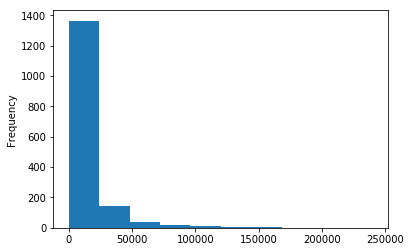

In [28]:
ctd_merge['Customer_Lifetime_value'].plot(kind='hist')

In [41]:
criteria = [ctd_merge['Customer_Lifetime_value'].between(0, 25000), 
            ctd_merge['Customer_Lifetime_value'].between(25001, 50000), 
            ctd_merge['Customer_Lifetime_value'].between(50001, 75000),
            ctd_merge['Customer_Lifetime_value'].between(75001, 100000)]
values = ['Copper', 'Silver', 'Gold', 'Platinum']

ctd_merge['CLV_Category'] = np.select(criteria, values, 'Platinum' )

In [36]:
ctd_merge.shape

(1581, 6)

In [42]:
ctd_merge['Customer_Lifetime_value'].value_counts()

1045     3
1009     3
2399     3
2044     3
2243     3
1686     2
2852     2
1938     2
4439     2
5018     2
4700     2
2648     2
802      2
2022     2
984      2
333      2
3847     2
1051     2
860      2
3094     2
2979     2
1404     2
21096    2
7821     2
1378     2
4268     2
870      2
856      2
391      2
4469     2
        ..
1367     1
34143    1
7292     1
1372     1
6299     1
12889    1
3870     1
46401    1
36138    1
66667    1
12952    1
1904     1
1325     1
1326     1
1327     1
1328     1
3377     1
2939     1
1331     1
7476     1
2166     1
5430     1
2630     1
16144    1
23525    1
1344     1
1213     1
1341     1
1343     1
22528    1
Name: Customer_Lifetime_value, Length: 1518, dtype: int64

In [43]:
ctd_merge.head()

,customer_id,TotalPrice,Total_visits,Total_Profit,Customer_Lifetime_value,CLV_Category
0,1,51737.06,33,0.5,4268,Copper
1,2,24176.29,28,0.8,2707,Copper
2,3,49172.86,29,0.7,4991,Copper
3,4,28690.83,22,0.5,1577,Copper
4,5,56424.57,92,0.7,18168,Copper


Shows the number of customers in each Category . Fewer in the Gold category

In [47]:
ctd_merge['CLV_Category'].value_counts()

Copper      1375
Silver       138
Platinum      38
Gold          30
Name: CLV_Category, dtype: int64

In [48]:
ctd_merge.head()

,customer_id,TotalPrice,Total_visits,Total_Profit,Customer_Lifetime_value,CLV_Category
0,1,51737.06,33,0.5,4268,Copper
1,2,24176.29,28,0.8,2707,Copper
2,3,49172.86,29,0.7,4991,Copper
3,4,28690.83,22,0.5,1577,Copper
4,5,56424.57,92,0.7,18168,Copper


In [50]:
ctd_merge.to_csv('LTV.csv')